https://www.kaggle.com/competitions/fake-news/data

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('submit.csv')

In [3]:
# Displaying rows and columns in dataset

print("There are {} number of rows and {} number of columns for training.".format(train.shape[0],train.shape[1]))
print("There are {} number of rows and {} number of columns for testing.".format(test.shape[0],test.shape[1]))

There are 20800 number of rows and 5 number of columns for training.
There are 5200 number of rows and 4 number of columns for testing.


In [4]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [6]:
#Checking the datatypes

train.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [7]:
#Checking for null values

train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
#Filling the nan values

train = train.fillna('')

In [9]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [11]:
test = test.fillna('')

In [12]:
train.author.nunique()

4202

In [13]:
test.author.nunique()

1733

<AxesSubplot:xlabel='label', ylabel='count'>

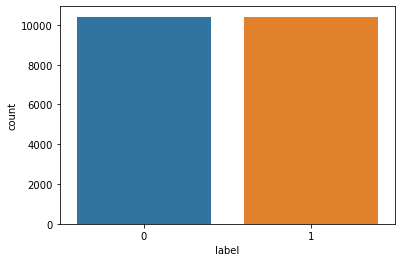

In [14]:
# Class Distribution
# 1: Unreliable
# 0: Reliable

import seaborn as sns
sns.countplot(x='label', data= train)

In [15]:
import string
import re
from nltk.corpus import stopwords

In [16]:
stop_word = stopwords.words('english')
def cleaning_data(x):
    #lower the value
    x =x.lower()
    
    #removing punctuations
    x=re.sub('[^a-zA-Z]',' ',x)
   
    #removing all the stopwords
    x = ' '.join([word for word in x.split(' ') if word not in stop_word])
    
    return x
    

In [17]:
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
train.title = train.title.apply(cleaning_data)
train.author = train.author.apply(cleaning_data)
train.text =  train.text.apply(cleaning_data)

In [19]:
train.head()

,id,title,author,text,label
0,0,house dem aide even see comey letter jason ch...,darrell lucus,house dem aide even see comey letter jason ch...,1
1,1,flynn hillary clinton big woman campus bre...,daniel j flynn,ever get feeling life circles roundabout rathe...,0
2,2,truth might get fired,consortiumnews com,truth might get fired october tensio...,1
3,3,civilians killed single us airstrike identi...,jessica purkiss,videos civilians killed single us airstrike...,1
4,4,iranian woman jailed fictional unpublished sto...,howard portnoy,print iranian woman sentenced six years priso...,1


In [20]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

def lematize(x):
    x = ' '.join([lemmatizer.lemmatize(word) for word in x.split(' ')])
    return x  


In [21]:
train.text =  train.text.apply(lematize)
train.title =  train.title.apply(lematize)

In [22]:
train.head()

,id,title,author,text,label
0,0,house dem aide even see comey letter jason ch...,darrell lucus,house dem aide even see comey letter jason ch...,1
1,1,flynn hillary clinton big woman campus bre...,daniel j flynn,ever get feeling life circle roundabout rather...,0
2,2,truth might get fired,consortiumnews com,truth might get fired october tensio...,1
3,3,civilian killed single u airstrike identified,jessica purkiss,video civilian killed single u airstrike id...,1
4,4,iranian woman jailed fictional unpublished sto...,howard portnoy,print iranian woman sentenced six year prison...,1


In [23]:
train['content'] = train.title + ' '+train.author

In [24]:
train.drop(['title' , 'author'] , axis = 1 , inplace = True)

In [25]:
train.head()

,id,text,label,content
0,0,house dem aide even see comey letter jason ch...,1,house dem aide even see comey letter jason ch...
1,1,ever get feeling life circle roundabout rather...,0,flynn hillary clinton big woman campus bre...
2,2,truth might get fired october tensio...,1,truth might get fired consortiumnews com
3,3,video civilian killed single u airstrike id...,1,civilian killed single u airstrike identifi...
4,4,print iranian woman sentenced six year prison...,1,iranian woman jailed fictional unpublished sto...


In [26]:
test.title = test.title.apply(cleaning_data)
test.author = test.author.apply(cleaning_data)
test.text =  test.text.apply(cleaning_data)

In [27]:
test.head()

,id,title,author,text
0,20800,specter trump loosens tongues purse strings ...,david streitfeld,palo alto calif years scorning politica...
1,20801,russian warships ready strike terrorists near ...,,russian warships ready strike terrorists near ...
2,20802,nodapl native american leaders vow stay wint...,common dreams,videos nodapl native american leaders vow st...
3,20803,tim tebow attempt another comeback time baseb...,daniel victor,first succeed try different sport tim tebow ...
4,20804,keiser report meme wars e,truth broadcast network,mins ago views comments likes first ...


In [28]:
test.text =  test.text.apply(lematize)
test.title =  test.title.apply(lematize)

In [29]:
test['content'] = test.title + ' ' + test.author

In [30]:
test.drop(['title' , 'author'] , axis =1 ,inplace = True)

In [31]:
test.head()

,id,text,content
0,20800,palo alto calif year scorning political...,specter trump loosens tongue purse string si...
1,20801,russian warship ready strike terrorist near al...,russian warship ready strike terrorist near al...
2,20802,video nodapl native american leader vow stay...,nodapl native american leader vow stay winte...
3,20803,first succeed try different sport tim tebow ...,tim tebow attempt another comeback time baseb...
4,20804,min ago view comment like first time...,keiser report meme war e truth broadcast...


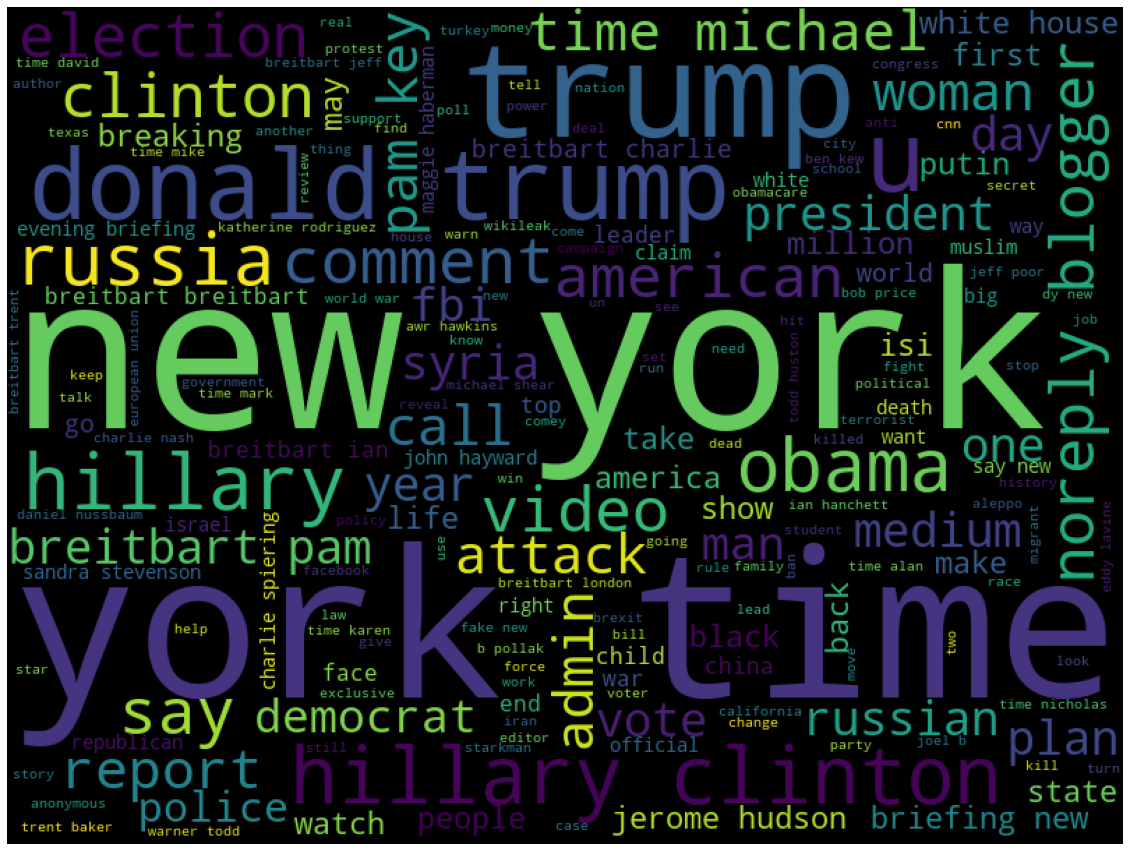

In [32]:
from wordcloud import WordCloud

# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)
# generate the word cloud
text_cloud = wordcloud.generate(" ".join(train['content']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()


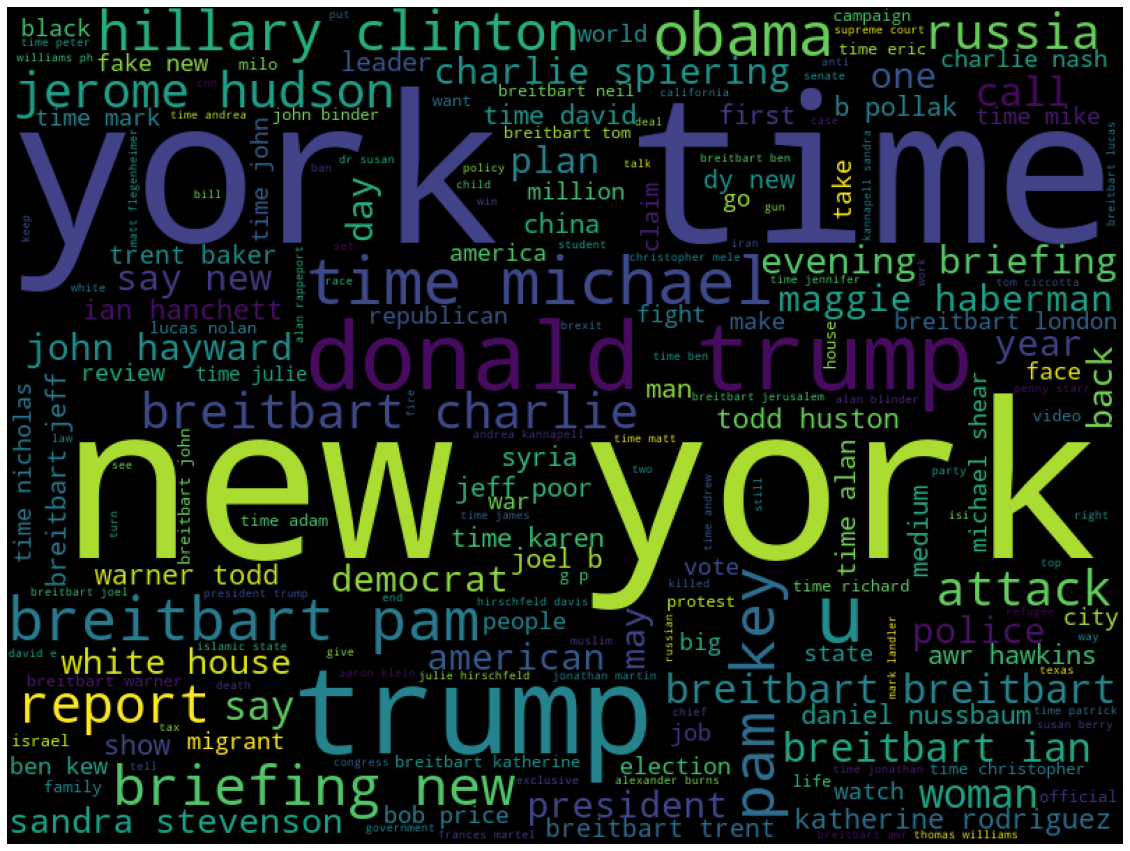

In [33]:
# reliable news (0)
reliable_news = " ".join(train[train['label']==0]['content'])
wc = wordcloud.generate(reliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

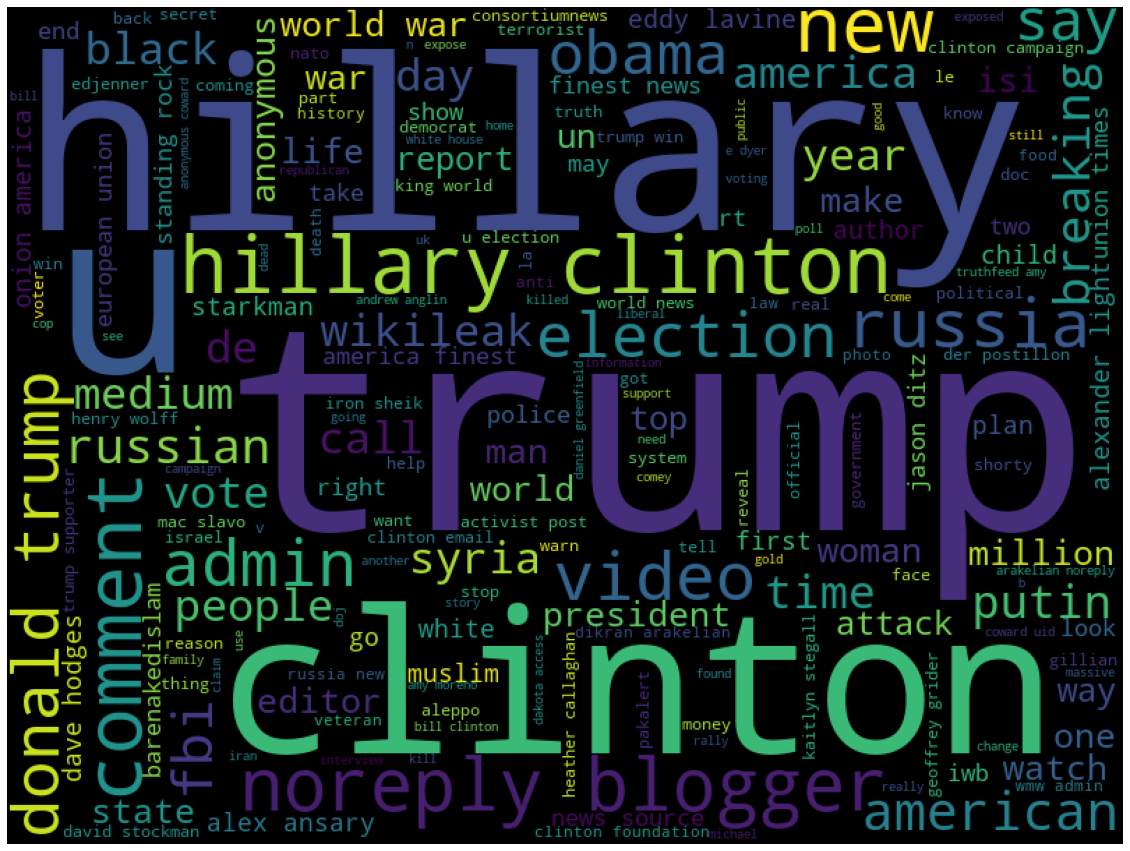

In [34]:
# unreliable news (1)
unreliable_news  = ' '.join(train[train['label']==1]['content'])
wc= wordcloud.generate(unreliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [35]:
y = train.label
train.drop(['label'] , axis =1 , inplace =True)

In [36]:
X = train.content.values
y = y.values

In [37]:
type(X)

numpy.ndarray

In [38]:
type(y)

numpy.ndarray

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y )

In [41]:
test_ = test.content.values

In [42]:
test_ = vectorizer.transform(test_)

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
X_predicted = model.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score
score1=accuracy_score( y_test,X_predicted)
print(score1)

0.9769230769230769


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,X_predicted)

array([[2429,   97],
       [  23, 2651]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,X_predicted))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2526
           1       0.96      0.99      0.98      2674

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)


DecisionTreeClassifier()

In [49]:
X_predicted2 = model2.predict(X_test)
score2=accuracy_score( y_test,X_predicted2)
print(score2)

0.9940384615384615


In [50]:
confusion_matrix(y_test,X_predicted2)

array([[2510,   16],
       [  15, 2659]], dtype=int64)

In [51]:
print(classification_report(y_test,X_predicted2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.99      0.99      0.99      2674

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200



## RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)


RandomForestClassifier()

In [53]:
X_predicted3 = model3.predict(X_test)
score3=accuracy_score( y_test,X_predicted3)
print(score3)

0.9948076923076923


In [54]:
confusion_matrix(y_test,X_predicted3)

array([[2506,   20],
       [   7, 2667]], dtype=int64)

In [55]:
print(classification_report(y_test,X_predicted3))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2526
           1       0.99      1.00      0.99      2674

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200



## XGBoost

In [56]:
from xgboost import XGBClassifier

model4 = XGBClassifier()
model4.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [57]:
X_predicted4 = model4.predict(X_test)
score4=accuracy_score( y_test,X_predicted4)
print(score4)

0.9880769230769231


In [58]:
print(classification_report(y_test,X_predicted4))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2526
           1       0.98      1.00      0.99      2674

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200



In [59]:
results = pd.DataFrame([["Logistic Regression",score1],["Decision Tree",score2],
                       ["Random Forest",score3],["XGBoost",score4]],columns=["Model","Accuracy"])

results

,Model,Accuracy
0,Logistic Regression,0.976923
1,Decision Tree,0.994038
2,Random Forest,0.994808
3,XGBoost,0.988077


In [60]:
prediction1 = model3.predict(test_)

In [61]:
submit.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [62]:
submit.label = prediction1

In [63]:
submit.to_csv('submission1.csv',index=False)